<a href="https://colab.research.google.com/github/diazameer/Image-Classification/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "rangagreeshmachenna" # username from the json file
os.environ['KAGGLE_KEY'] = "a537e4efb86156caf48dd0e039eab359" # key from the json file
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 96% 129M/134M [00:02<00:00, 57.0MB/s]
100% 134M/134M [00:02<00:00, 62.1MB/s]


In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/multiclass-weather-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')



done


In [3]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
# print(file_count)

['sunrise', 'foggy', 'cloudy', 'shine', 'rainy', 'test.csv', 'alien_test']


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
cloudy = "/content/dataset/cloudy"
foggy = "/content/dataset/foggy"
rainy = "/content/dataset/rainy"
shine = "/content/dataset/shine"
sunrise = "/content/dataset/sunrise"

In [100]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [101]:
#DATA PREPROCESSING FOR MODEL

x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(224,224))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [102]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 378.13it/s]


In [103]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 224, 224, 3), (1498,))

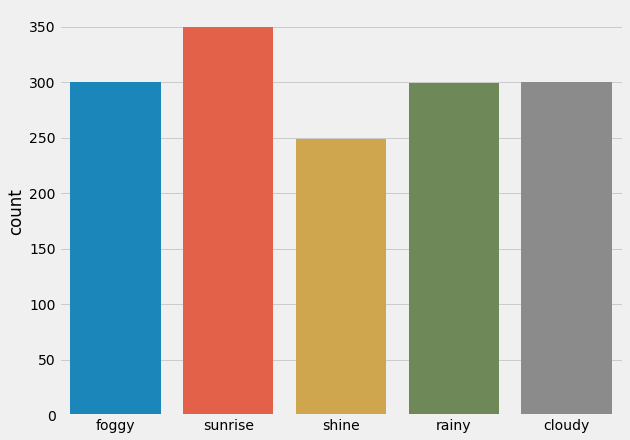

In [104]:
import seaborn as sns
plt.figure(figsize=(9,7))
plt.style.use("fivethirtyeight")
sns.countplot(y)
plt.show()

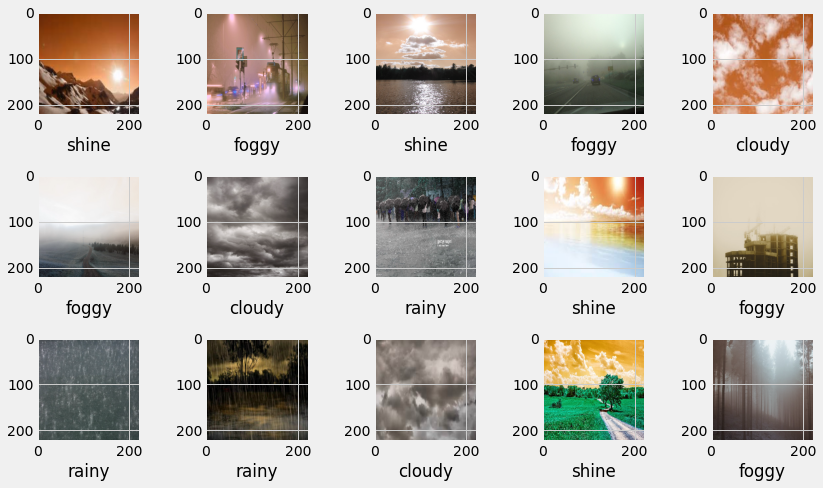

In [105]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
img_size =224

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test= lb.fit_transform(y_test)

In [50]:
x_train[0].shape

(224, 224, 3)

In [38]:
y_test

array([2, 0, 0, 0, 3, 3, 2, 3, 4, 1, 3, 2, 0, 0, 1, 1, 3, 2, 4, 1, 4, 4,
       1, 0, 4, 4, 0, 0, 0, 3, 1, 4, 3, 0, 2, 3, 4, 4, 4, 1, 4, 3, 2, 0,
       0, 4, 2, 4, 4, 0, 2, 2, 4, 2, 4, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3, 4,
       4, 0, 0, 0, 2, 2, 4, 4, 2, 4, 4, 4, 3, 4, 2, 1, 1, 3, 1, 1, 2, 0,
       3, 4, 2, 4, 2, 2, 2, 2, 4, 1, 4, 2, 1, 3, 3, 3, 0, 1, 1, 1, 1, 4,
       4, 0, 3, 4, 1, 4, 3, 0, 1, 2, 3, 4, 3, 4, 1, 2, 3, 3, 3, 1, 1, 1,
       4, 2, 4, 1, 2, 4, 2, 1, 4, 1, 0, 2, 1, 4, 4, 0, 3, 0, 2, 2, 4, 4,
       3, 0, 4, 3, 1, 4, 2, 1, 4, 1, 1, 4, 0, 3, 4, 4, 2, 4, 2, 1, 3, 4,
       2, 4, 3, 1, 2, 0, 1, 3, 3, 2, 0, 4, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 4, 0, 2, 2, 1, 2, 4, 4, 1, 3, 2, 2, 2, 0, 4, 2, 0, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 0, 4, 4, 2, 4, 2, 3, 0, 0, 0, 3, 4, 3, 2,
       1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 4, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 4, 1, 4, 2, 0, 1, 4, 3, 2, 3, 3, 0, 2, 2, 4, 0, 3, 0, 1, 2, 1,
       0, 1, 0, 3, 0, 1, 0, 0, 2, 4, 0, 2, 0, 4])

In [51]:
y_train.shape,y_test.shape

((1198, 5), (300, 5))

In [17]:
#MODEL BUILDING


from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
#from keras import layers

In [29]:
import keras
model = keras.Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(Dense(100,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               9216500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
history = model.fit(x_train,y_train,epochs = 15,validation_data = (x_test,y_test),callbacks=[early_stop],batch_size=10)

Epoch 1/15
120/120 [==============================] - 2s 14ms/step - loss: 1.4437 - accuracy: 0.4152 - val_loss: 0.9507 - val_accuracy: 0.6567
Epoch 2/15
120/120 [==============================] - 1s 11ms/step - loss: 0.9344 - accuracy: 0.6387 - val_loss: 0.9127 - val_accuracy: 0.6767
Epoch 3/15
120/120 [==============================] - 1s 11ms/step - loss: 0.7911 - accuracy: 0.7057 - val_loss: 0.8312 - val_accuracy: 0.6767
Epoch 4/15
120/120 [==============================] - 1s 11ms/step - loss: 0.6065 - accuracy: 0.7810 - val_loss: 0.6864 - val_accuracy: 0.7533
Epoch 5/15
120/120 [==============================] - 1s 11ms/step - loss: 0.5576 - accuracy: 0.7938 - val_loss: 0.6478 - val_accuracy: 0.7867
Epoch 6/15
120/120 [==============================] - 1s 11ms/step - loss: 0.4902 - accuracy: 0.8133 - val_loss: 0.6889 - val_accuracy: 0.7567
Epoch 7/15
120/120 [==============================] - 1s 11ms/step - loss: 0.3496 - accuracy: 0.8786 - val_loss: 0.6653 - val_accuracy: 0.8100

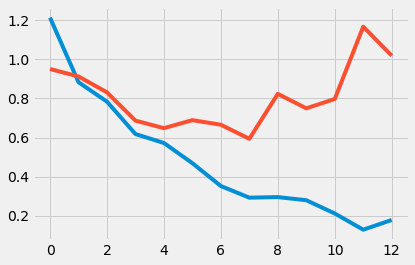

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
y_pred = model.predict_classes(x_test)
y_pred

array([1, 2, 0, 1, 3, 3, 2, 3, 4, 1, 3, 1, 2, 0, 1, 2, 3, 3, 4, 2, 4, 4,
       4, 1, 4, 4, 0, 0, 1, 3, 1, 4, 3, 0, 2, 3, 4, 4, 4, 2, 4, 3, 1, 3,
       0, 4, 2, 4, 4, 3, 2, 2, 4, 2, 4, 2, 1, 3, 1, 3, 2, 2, 1, 1, 3, 4,
       4, 3, 1, 0, 2, 2, 4, 4, 0, 4, 4, 4, 3, 4, 2, 1, 1, 3, 2, 1, 2, 0,
       3, 4, 2, 4, 2, 2, 2, 2, 4, 0, 4, 2, 0, 3, 3, 3, 2, 1, 1, 2, 3, 4,
       4, 3, 3, 4, 1, 4, 3, 0, 2, 2, 3, 4, 3, 4, 0, 2, 2, 3, 3, 1, 1, 4,
       4, 4, 4, 1, 2, 4, 2, 1, 4, 1, 3, 2, 2, 4, 4, 1, 3, 0, 2, 1, 4, 4,
       3, 0, 4, 1, 1, 4, 2, 3, 4, 1, 2, 4, 3, 3, 4, 4, 2, 4, 2, 1, 3, 4,
       3, 4, 3, 0, 2, 0, 1, 3, 3, 2, 3, 4, 4, 1, 3, 1, 3, 0, 1, 0, 1, 2,
       2, 2, 2, 4, 0, 2, 2, 0, 2, 4, 1, 1, 3, 2, 2, 2, 3, 4, 2, 3, 0, 1,
       0, 2, 2, 1, 3, 1, 1, 3, 0, 4, 4, 2, 4, 2, 3, 0, 0, 0, 3, 4, 3, 2,
       2, 3, 3, 2, 0, 3, 2, 1, 3, 3, 2, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 4, 2, 3, 2, 0, 2, 4, 3, 2, 3, 3, 3, 2, 2, 4, 1, 3, 0, 1, 3, 1,
       3, 1, 0, 3, 0, 2, 3, 1, 1, 4, 2, 2, 0, 4])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.78      0.48      0.60        60
           1       0.64      0.57      0.60        56
           2       0.75      0.82      0.78        71
           3       0.63      0.93      0.75        45
           4       0.96      0.97      0.96        68

    accuracy                           0.76       300
   macro avg       0.75      0.76      0.74       300
weighted avg       0.77      0.76      0.75       300



In [41]:
from tensorflow import keras
from keras.applications.mobilenet_v2 import MobileNetV2

In [43]:
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False,weights='imagenet')


In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(keras.layers.Dropout(0.6))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_8 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


In [68]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("mobilenet_v2.hdf5",monitor="val_accuracy",verbose=1,save_best_only=True,save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [69]:
y_train

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [70]:
unique,counts = np.unique(np.argmax(y_test,axis=1),return_counts=True)
print(unique,counts)


[0 1 2 3 4] [60 56 71 45 68]


In [71]:
batch_size=32
history =  model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
38/38 [==============================] - 5s 74ms/step - loss: 2.9408 - accuracy: 0.6345 - val_loss: 1.4488 - val_accuracy: 0.8533

Epoch 00001: val_accuracy improved from -inf to 0.85333, saving model to mobilenet_v2.hdf5
Epoch 2/15
38/38 [==============================] - 2s 52ms/step - loss: 0.5913 - accuracy: 0.9226 - val_loss: 0.5002 - val_accuracy: 0.9267

Epoch 00002: val_accuracy improved from 0.85333 to 0.92667, saving model to mobilenet_v2.hdf5
Epoch 3/15
38/38 [==============================] - 2s 52ms/step - loss: 0.0790 - accuracy: 0.9829 - val_loss: 0.6743 - val_accuracy: 0.9200

Epoch 00003: val_accuracy did not improve from 0.92667
Epoch 4/15
38/38 [==============================] - 2s 52ms/step - loss: 0.0995 - accuracy: 0.9855 - val_loss: 0.8325 - val_accuracy: 0.9100

Epoch 00004: val_accuracy did not improve from 0.92667
Epoch 5/15
38/38 [==============================] - 2s 53ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.7730 - val_accuracy: 0.9

In [72]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

10/10 [==============================] - 0s 44ms/step - loss: 0.9023 - accuracy: 0.9333
Loss: 0.9023317694664001
Accuracy: 0.9333333373069763


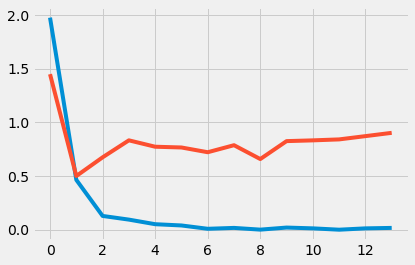

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [74]:
y_pred = model.predict_classes(x_test)
y_pred

array([1, 0, 0, 0, 3, 3, 2, 0, 4, 1, 3, 2, 0, 0, 1, 1, 3, 2, 4, 1, 4, 4,
       1, 0, 4, 4, 0, 0, 0, 4, 1, 4, 3, 0, 2, 2, 4, 4, 4, 0, 4, 3, 2, 0,
       0, 4, 2, 4, 4, 0, 2, 2, 4, 2, 4, 3, 1, 0, 1, 4, 2, 4, 0, 1, 3, 4,
       4, 0, 0, 0, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 1, 1, 3, 1, 1, 2, 0,
       3, 4, 2, 4, 2, 2, 2, 2, 4, 1, 4, 2, 1, 3, 3, 3, 0, 1, 1, 1, 1, 4,
       4, 0, 3, 0, 1, 4, 3, 0, 1, 1, 4, 4, 3, 4, 1, 2, 3, 3, 3, 1, 1, 1,
       4, 2, 4, 1, 2, 4, 2, 1, 4, 1, 0, 2, 1, 4, 4, 1, 3, 0, 2, 2, 4, 4,
       3, 0, 4, 3, 1, 4, 2, 1, 4, 1, 2, 4, 0, 3, 4, 4, 2, 4, 2, 1, 3, 4,
       2, 4, 3, 1, 2, 0, 1, 4, 3, 2, 0, 1, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 2, 0, 4, 0, 2, 2, 1, 2, 4, 4, 1, 4, 2, 2, 2, 0, 4, 2, 0, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 0, 0, 4, 4, 2, 4, 2, 3, 0, 0, 0, 3, 4, 3, 2,
       1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 4, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 4, 1, 4, 2, 0, 1, 4, 0, 2, 3, 3, 0, 2, 2, 4, 0, 3, 0, 1, 2, 1,
       0, 1, 0, 3, 0, 1, 0, 0, 3, 4, 0, 2, 0, 4])

In [76]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.92      0.96      0.94        56
           2       0.97      0.92      0.94        71
           3       0.97      0.82      0.89        45
           4       0.90      0.97      0.94        68

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



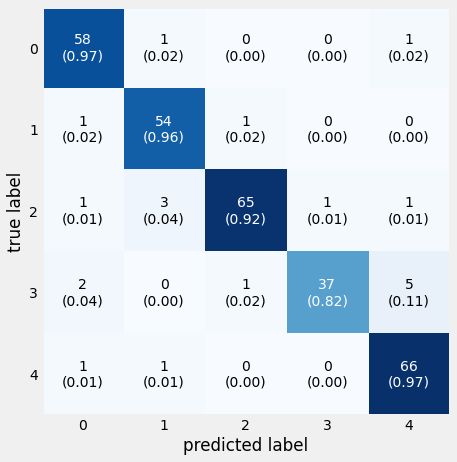

In [85]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                      show_normed = True);

In [84]:
plot_confusion_matrix?

In [132]:
!wget https://www.farmersalmanac.com/wp-content/uploads/2020/11/sunrise.jpg -O rain.jpg

--2021-04-22 19:02:40--  https://www.farmersalmanac.com/wp-content/uploads/2020/11/sunrise.jpg
Resolving www.farmersalmanac.com (www.farmersalmanac.com)... 172.67.71.98, 104.26.8.63, 104.26.9.63, ...
Connecting to www.farmersalmanac.com (www.farmersalmanac.com)|172.67.71.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397294 (388K) [image/jpeg]
Saving to: ‘rain.jpg’

rain.jpg            100%[===================>] 387.98K  2.19MB/s    in 0.2s    

2021-04-22 19:02:40 (2.19 MB/s) - ‘rain.jpg’ saved [397294/397294]



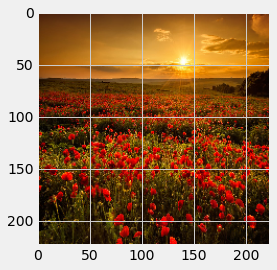

In [133]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
x = image.load_img('rain.jpg',target_size = (img_size,img_size,3))
plt.imshow(x)

In [134]:
x = image.img_to_array(x)
x.shape


(224, 224, 3)

In [135]:
import numpy as np
x = np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [136]:
from keras.applications.mobilenet_v2 import preprocess_input

In [137]:
x = preprocess_input(x)
op = model.predict(x)
op = np.argmax(op)
op


3

In [138]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [139]:
le.inverse_transform(y)

array(['foggy', 'foggy', 'foggy', ..., 'cloudy', 'cloudy', 'cloudy'],
      dtype='<U7')

In [140]:
le.classes_

array(['cloudy', 'foggy', 'rainy', 'shine', 'sunrise'], dtype='<U7')

In [141]:
le.classes_[op]

'shine'